#Import Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import standard dependencies

import cv2
import os
import random
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
# Import tensorflow dependencies - Functional API

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

#Move LFW to repository data/negative

In [ ]:
"""
import os

for directory in os.listdir('/content/drive/MyDrive/FaceRecognitionandVerification/lfw'):
    for file in os.listdir(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/lfw', directory)):
        EX_PATH = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/lfw', directory, file)
        NEW_PATH = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/negative', file)
        os.replace(EX_PATH, NEW_PATH)
"""

"\nimport os\n\nfor directory in os.listdir('/content/drive/MyDrive/FaceRecognitionandVerification/lfw'):\n    for file in os.listdir(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/lfw', directory)):\n        EX_PATH = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/lfw', directory, file)\n        NEW_PATH = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/negative', file)\n        os.replace(EX_PATH, NEW_PATH)\n"

#Collect Positive and Achor Classes

In [ ]:
"""
import cv2
import os
import uuid
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join("C:\\Users\\Comp\\Documents\\GUILHERME\\FaceRecognitionandVerification\\data\\anchor", '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join("C:\\Users\\Comp\\Documents\\GUILHERME\\FaceRecognitionandVerification\\data\\positive", '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()
"""

'\nimport cv2\nimport os\nimport uuid\n# Establish a connection to the webcam\ncap = cv2.VideoCapture(0)\nwhile cap.isOpened(): \n    ret, frame = cap.read()\n   \n    # Cut down frame to 250x250px\n    frame = frame[120:120+250,200:200+250, :]\n    \n    # Collect anchors \n    if cv2.waitKey(1) & 0XFF == ord(\'a\'):\n        # Create the unique file path \n        imgname = os.path.join("C:\\Users\\Comp\\Documents\\GUILHERME\\FaceRecognitionandVerification\\data\\anchor", \'{}.jpg\'.format(uuid.uuid1()))\n        # Write out anchor image\n        cv2.imwrite(imgname, frame)\n    \n    # Collect positives\n    if cv2.waitKey(1) & 0XFF == ord(\'p\'):\n        # Create the unique file path \n        imgname = os.path.join("C:\\Users\\Comp\\Documents\\GUILHERME\\FaceRecognitionandVerification\\data\\positive", \'{}.jpg\'.format(uuid.uuid1()))\n        # Write out positive image\n        cv2.imwrite(imgname, frame)\n    \n    # Show image back to screen\n    cv2.imshow(\'Image Collection\

#Data Augmentation

In [ ]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [ ]:
import os
import uuid

In [ ]:
"""
for file_name in os.listdir(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor2')):
    img_path = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor2', file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor1', '{}.jpg'.format(uuid.uuid1())), image.numpy())
"""

"\nfor file_name in os.listdir(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor2')):\n    img_path = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor2', file_name)\n    img = cv2.imread(img_path)\n    augmented_images = data_aug(img) \n    \n    for image in augmented_images:\n        cv2.imwrite(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor1', '{}.jpg'.format(uuid.uuid1())), image.numpy())\n"

In [ ]:
"""
for file_name in os.listdir(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/positive2')):
    img_path = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/positive2', file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/positive1', '{}.jpg'.format(uuid.uuid1())), image.numpy())
"""

"\nfor file_name in os.listdir(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/positive2')):\n    img_path = os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/positive2', file_name)\n    img = cv2.imread(img_path)\n    augmented_images = data_aug(img) \n    \n    for image in augmented_images:\n        cv2.imwrite(os.path.join('/content/drive/MyDrive/FaceRecognitionandVerification/data/positive1', '{}.jpg'.format(uuid.uuid1())), image.numpy())\n"

#Load and Preprocess Images

##Get Image Directories

In [ ]:
anchor = tf.data.Dataset.list_files('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor1' + '/*.jpg').take(3000)
positive = tf.data.Dataset.list_files('/content/drive/MyDrive/FaceRecognitionandVerification/data/positive1' + '/*.jpg').take(3000)
negative = tf.data.Dataset.list_files('/content/drive/MyDrive/FaceRecognitionandVerification/data/negative' + '/*.jpg').take(3000)

In [ ]:
dir_test = anchor.as_numpy_iterator()

In [ ]:
print(dir_test.next())

b'/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor1/66f50c7e-6999-11ec-84e0-0242ac1c0002.jpg'


##Preprocessing - Scale and Resizing

In [ ]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [ ]:
img = preprocess('/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor1/6903bf56-6999-11ec-84e0-0242ac1c0002.jpg')

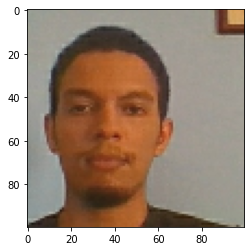

In [ ]:
plt.imshow(img)

In [ ]:
#dataset.map(preprocess)

#Create Labelled Dataset

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
data

<ConcatenateDataset shapes: ((), (), ()), types: (tf.string, tf.string, tf.float32)>

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
exampple = samples.next()

In [ ]:
exampple

(b'/content/drive/MyDrive/FaceRecognitionandVerification/data/anchor1/6618962c-6999-11ec-84e0-0242ac1c0002.jpg',
 b'/content/drive/MyDrive/FaceRecognitionandVerification/data/positive1/de4eff60-69a2-11ec-8444-0242ac1c0002.jpg',
 1.0)

In [ ]:
#tf.ones(len(anchor))

In [ ]:
#tf.zeros(len(anchor))

#Build Train and Test Partition

In [ ]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
res = preprocess_twin(*exampple)

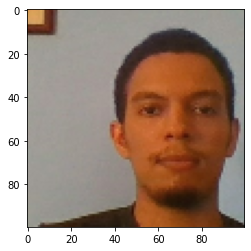

In [ ]:
plt.imshow(res[0])

In [ ]:
res[2]

1.0

In [ ]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
samples.next()

(array([[[0.7637255 , 0.6617647 , 0.46960783],
         [0.78357846, 0.67965686, 0.4884804 ],
         [0.7911765 , 0.6754902 , 0.48137254],
         ...,
         [0.6137255 , 0.62941176, 0.57058823],
         [0.61470586, 0.6392157 , 0.577451  ],
         [0.5992647 , 0.62671566, 0.56397057]],
 
        [[0.7730392 , 0.657598  , 0.47230393],
         [0.7941176 , 0.67083335, 0.4879902 ],
         [0.80465686, 0.68210787, 0.49779412],
         ...,
         [0.6245098 , 0.63235295, 0.57843137],
         [0.62058824, 0.6343137 , 0.577451  ],
         [0.61764705, 0.6313726 , 0.5745098 ]],
 
        [[0.80269605, 0.6732843 , 0.5026961 ],
         [0.8105392 , 0.6813725 , 0.50441176],
         [0.80759805, 0.6791667 , 0.5007353 ],
         ...,
         [0.6370098 , 0.6404412 , 0.5872549 ],
         [0.6362745 , 0.64117646, 0.5872549 ],
         [0.6401961 , 0.64509803, 0.59117645]],
 
        ...,
 
        [[0.61985296, 0.6237745 , 0.56102943],
         [0.61151963, 0.6154412 , 0.55269

In [ ]:
len(samples.next())

3

In [ ]:
samp = samples.next()

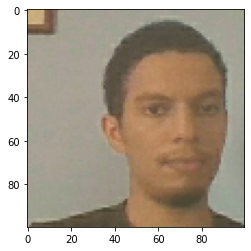

In [ ]:
plt.imshow(samp[0])

In [ ]:
samp[2]

1.0

In [ ]:
round(len(data)*.7)

2911

In [ ]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
round(len(data)*.3)

1247

In [ ]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

#Model Engineering

##Build Embedding

In [ ]:
inp = Input(shape=(100,100,3), name='input_image')

In [ ]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [ ]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [ ]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [ ]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [ ]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [ ]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
mod.summary()

In [ ]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

#Build Distance Layer

In [ ]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

In [ ]:
#l1(anchor_embedding, validation_embedding)

##Make Siamese Model

In [ ]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [ ]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [ ]:
siamese_layer = L1Dist()

In [ ]:
distances = siamese_layer(inp_embedding, val_embedding)

In [ ]:
classifier = Dense(1, activation='sigmoid')(distances)

In [ ]:
classifier

In [ ]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_network.summary()

In [ ]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

#Training

##Setup Loss and Optimizer

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

##Stabilish Checkpoints

In [ ]:
checkpoint_dir = '/content/drive/MyDrive/FaceRecognitionandVerification/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

##Build Train Step Function

In [ ]:
test_batch = train_data.as_numpy_iterator()

In [ ]:
batch_1 = test_batch.next()

In [ ]:
batch_1[2]

In [ ]:
X = batch_1[:2]

In [ ]:
y = batch_1[2]

In [ ]:
y

In [ ]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

##Build Train Loop

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
182/182 [==============================] - 222s 1s/step
0.40245926 0.8453039 0.9792

 Epoch 2/50
122/182 [===================>..........] - ETA: 1:07

#Evaluate Model

##Import Metrics

##Make Predictions

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
predictions = siamese_model.predict([test_input, test_val])
predictions

array([[1.0000000e+00],
       [9.9999869e-01],
       [9.9999988e-01],
       [9.9993658e-01],
       [9.9991310e-01],
       [1.2470210e-13],
       [9.9999809e-01],
       [9.9999976e-01],
       [2.0189215e-09],
       [1.9901371e-08],
       [9.9999988e-01],
       [9.9992573e-01],
       [9.9556136e-01],
       [9.9608898e-01],
       [1.7869560e-10]], dtype=float32)

In [ ]:
y_hat = siamese_model.predict([test_input, test_val])

In [ ]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]

In [ ]:
y_true

array([1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

#Calculate Metrics

In [ ]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:

r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())


0.9984051 1.0


#Compare results

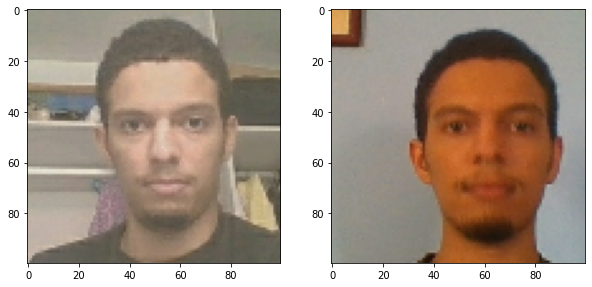

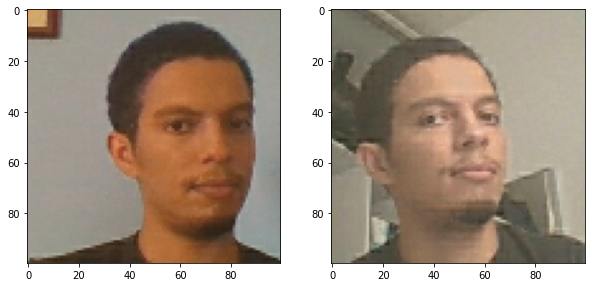

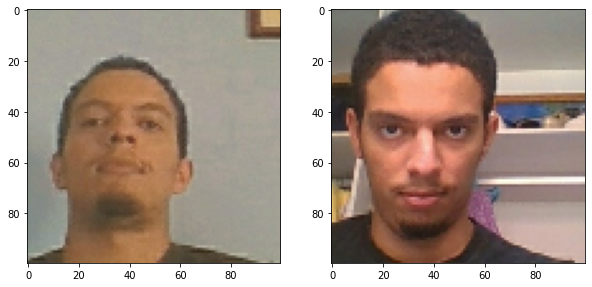

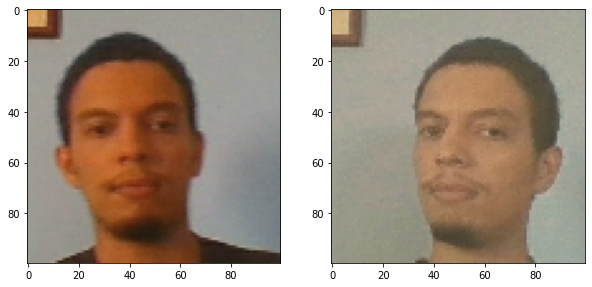

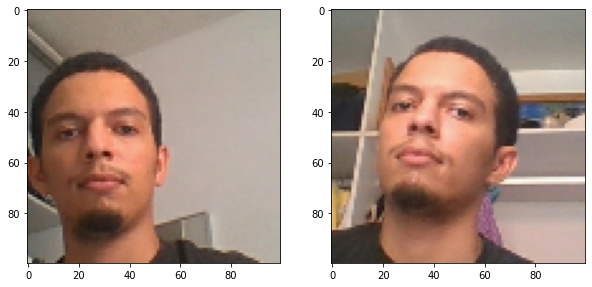

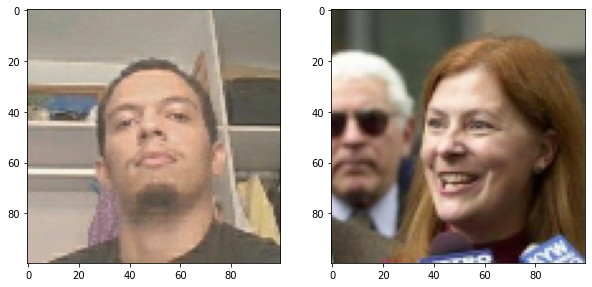

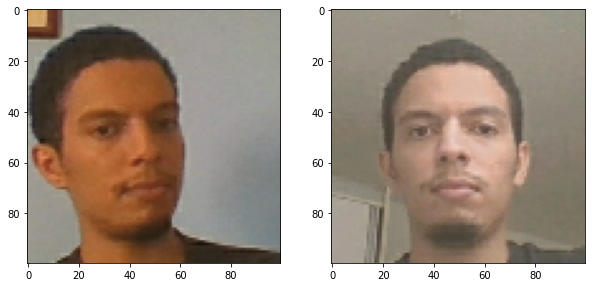

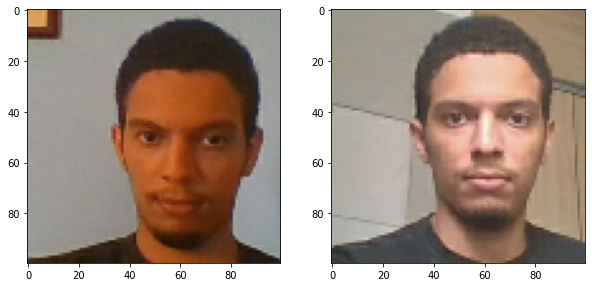

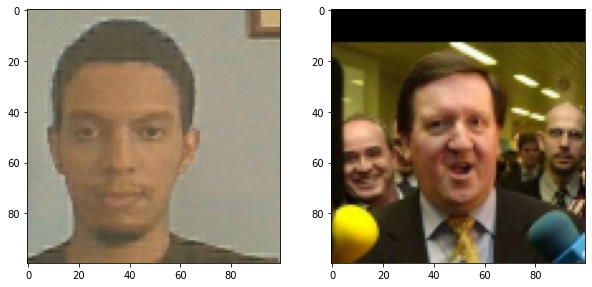

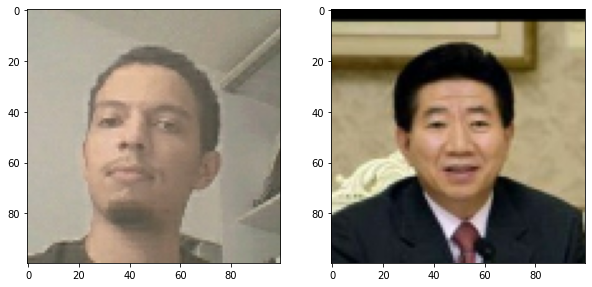

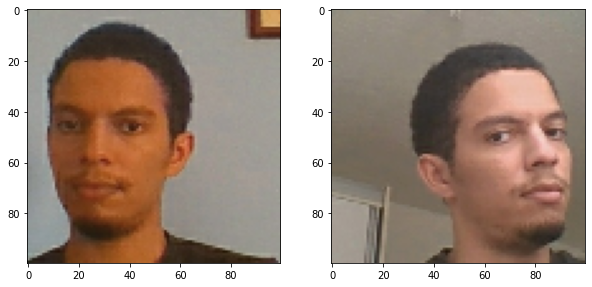

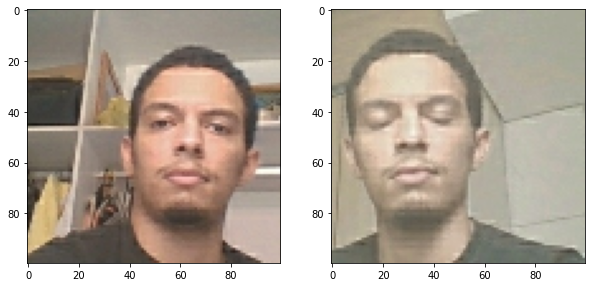

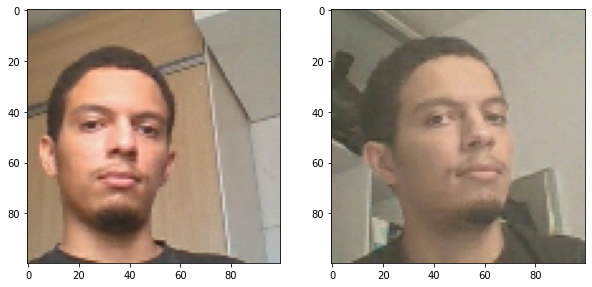

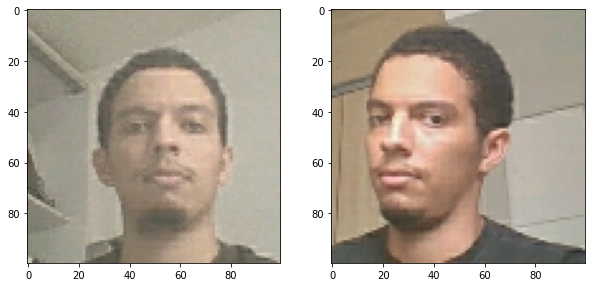

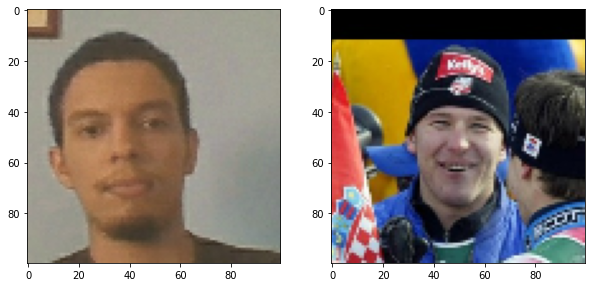

In [ ]:
for i in range(len(test_val)):
  # Set plot size 
  plt.figure(figsize=(10,8))

  # Set first subplot
  plt.subplot(1,2,1)
  plt.imshow(test_input[i])

  # Set second subplot
  plt.subplot(1,2,2)
  plt.imshow(test_val[i])

  # Renders cleanly
  plt.show()

#Save the Model

In [ ]:
siamese_model.save('siamesemodelv3.h5')

In [ ]:
L1Dist

__main__.L1Dist

In [ ]:
# Reload model 
model = tf.keras.models.load_model('siamesemodelv4.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

array([[1.0000000e+00],
       [9.9999869e-01],
       [9.9999988e-01],
       [9.9993658e-01],
       [9.9991310e-01],
       [1.2470210e-13],
       [9.9999809e-01],
       [9.9999976e-01],
       [2.0189215e-09],
       [1.9901371e-08],
       [9.9999988e-01],
       [9.9992573e-01],
       [9.9556136e-01],
       [9.9608898e-01],
       [1.7869560e-10]], dtype=float32)

In [ ]:
# View model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

#Real Time Test

##Verification Function

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

#OpenCV Real Time Verification

In [ ]:
cap = cv2.VideoCapture(4)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()